# Data Story 8

This notebook is a part of my 8th day in analyzing datasets.

Let's jump straight to some Air Quality.

In [28]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/stations.csv


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
%matplotlib inline

In [30]:
#reading in the data
data = pd.read_csv('../input/air-quality-data-in-india/city_day.csv')
data.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,NaN,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,NaN,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN


In [31]:
# creating a new year column
data['Date'] = pd.to_datetime(data['Date'])
data['year'] = data['Date'].dt.year

# Report of Air Quality Data in India

In [32]:
report = ProfileReport(data)
report

# How AQI(air quality index) is distributed?

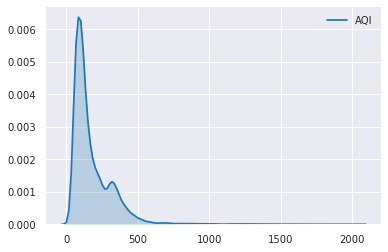

In [33]:
sns.set_style("darkgrid")
sns.kdeplot(data=data['AQI'],label="AQI" ,shade=True)

# Which city has lowest AQI?

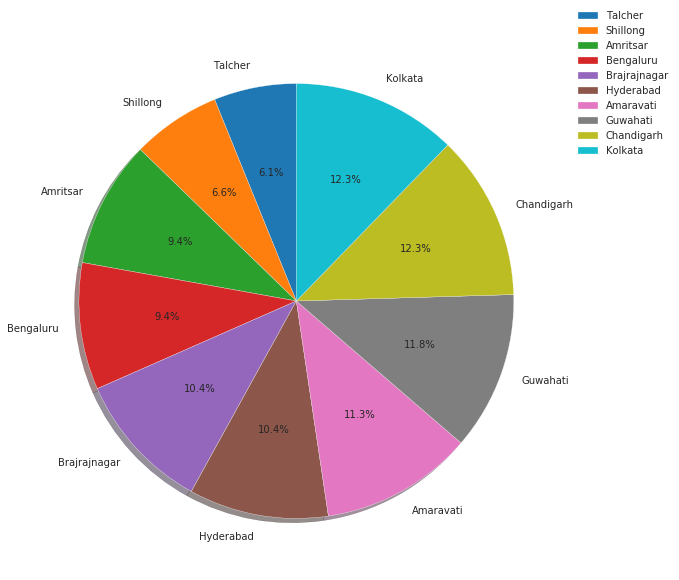

In [34]:
aqi = data.groupby('City')['AQI'].min().reset_index()
aqi  = aqi.sort_values("AQI")
aqi = aqi.head(10)
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(aqi['AQI'].tolist(), labels=aqi['City'].tolist(), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(loc='right',bbox_to_anchor=(1.2,0.9))
plt.show()

# Cities with lowest AQI per year

In [39]:
perc = data.loc[:,["year","City",'AQI']]
perc['mean_AQI'] = perc.groupby([perc.City,perc.year])['AQI'].transform('mean')
perc.drop('AQI', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values("year",ascending = False)
top_brand = ['Talcher','Amritsar','Brajrajnagar'] 
perc = perc.loc[perc['City'].isin(top_brand)]
perc = perc.sort_values("year")
perc = perc.fillna(100)
fig=px.bar(perc,x='City', y="mean_AQI", animation_frame="year", 
           animation_group="City", color="City", hover_name="City")
fig.show()

# Which City has highest AQI?

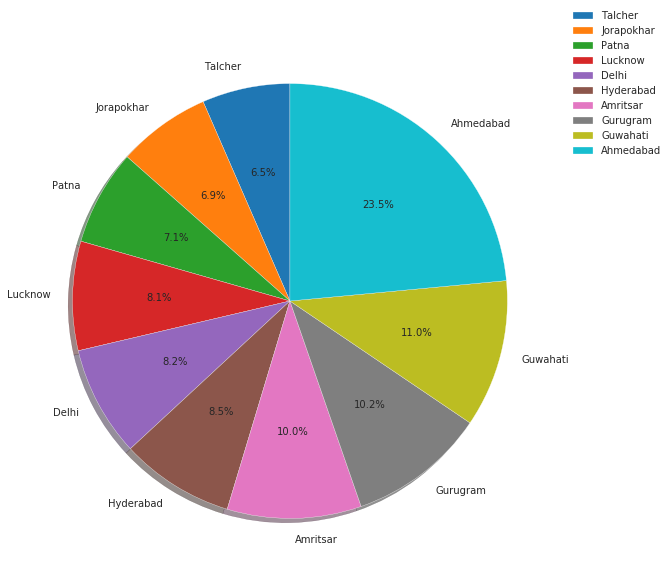

In [40]:
aqi = data.groupby('City')['AQI'].max().reset_index()
aqi  = aqi.sort_values("AQI")
aqi = aqi.tail(10)
fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.pie(aqi['AQI'].tolist(), labels=aqi['City'].tolist(), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend(loc='right',bbox_to_anchor=(1.2,0.9))
plt.show()

# Cities with highest AQI per year

In [41]:
perc = data.loc[:,["year","City",'AQI']]
perc['mean_AQI'] = perc.groupby([perc.City,perc.year])['AQI'].transform('mean')
perc.drop('AQI', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values("year",ascending = False)
top_brand = ['Hyderabad','Amritsar','Gurugram','Guwahati',"Ahmedabad"] 
perc = perc.loc[perc['City'].isin(top_brand)]
perc = perc.sort_values(by="year")
perc = perc.fillna(100)
fig=px.bar(perc,x='City', y="mean_AQI", animation_frame="year", 
           animation_group="City", color="City", hover_name="City")
fig.show()

I will end my today's analysis here. Tomorrow I will continue with analysing the cities with highest AQI because they are the ones that need more attention and need to be improved.

I will also try to see if there was any decrease noticed in AQI that may provide insights about future steps to be taken.

See ya.